# Supervised Learning - Classification

# Agenda
- What is Classification
- Applications of Classification
- Types of Classification
- Binary Classification
  - Logistic Regression
    - Mathematical Concept
    - Example with Breast Cancer Dataset
  - Performance metrics in Classification
    - Confusion Matrix
      - Accuracy
      - Precision
      - Recall
      - F1 Score
      - Specificity
   - Naive Bayes Classifier
     - Mathematical Concept
     - Example with Breast Cancer Dataset
   - K Nearest Neighbors(KNN)
     -  Apply KNN on Breast Cancer Dataset
     -  Hyperparameter Tuning of KNN
   - Decision Tree
     - How Decision Tree Works
     - Metrics for Splitting
     - Pruning
     - Apply DecisionTree on Breast Cancer Data
     - Hyperparameter Tuning Decision Tree
   - Support Vector Machine (SVM)
     - Apply SVM on Breast Cancer Data
     - Hyperparameter Tuning

## Classification
Classification is a supervised Machine Learning Technique where the model s trained to predict the class label of a given input data. It looks for a decision boundary, which divides the data into different classes. This implies the target variable is of categorical nature(Text, finite discrete numbers)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Classification.png)

## Applications of Classification
- **1.HealthCare**
- **2.Finance**
- **3.Marketing**
- **4.Retail**
- **5.Manufacturing** 

# Types of Classification
- Binary Classification -  When the target variable has only 2 classes (Male/Female, Yes/No, 0/1, Black/White etc)
- Multiclass Classification - When the target variable has more than 2 classes(Species of flowers, M/F/T )
- Multilabel Classification - When there are multiple targets for 1 input (Obect Detection, Face Recognition)
- Imbalanced Class Classification -  when one of the class outnumbers other classes significantly

## Binary Class Classification

Binary classification is the most simple type of classification, where the model predicts one of two possible outcomes. For example, yes or no, true or false, spam or not spam.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Machine_learning.png)

Some popular algorithms used for binary classification are:
- Logistic Regression(preferred for binary class only)
- Naïve Bayes
- K-Nearest Neighbors (KNN)
- Decision Trees
- Support Vector Machines (SVM)


While these methods excel in binary settings, they are equally capable of handling multi-class classification tasks. This versatility allows them to be used in a wider range of applications, such as recognizing multiple categories of objects in images or predicting several types of customer behavior.

## Logistic Regression

**Logistic regression** is a supervised machine learning technique primarily used for binary classification. In this method, we apply the sigmoid function to the linear combination of independent variables/predictors (features). This produces a probability value between 0 and 1. This probability represents the likelihood of a datapoint belonging to a specific class (e.g., positive or negative outcome).If the estimated probability isgreater than 0.5, then the model predicts that the instance belongs to a positive class labeled “1” or else it predicts that it does not (i.e., itbelongs to the negative class, labeled “0”). This makes it a binary classifier.

## Mathematical Concept

**1. Logistic Function (Sigmoid Function):**
The Core of logistic regression is the logistic function, also known as sigmoid function (denoted by $\sigma(z)$ ) which maps any real valued number into the range (0,1)
$$\sigma(z) =  \frac{1}{1+ e^{-z}}$$

where `z` is a linear combination of input features. This function outputs the probability of the input belonging to the positive class(class 1) 

**2. Linear Combination of inputs:**
The input features `X` are combined linearly using weights `w` and a bias term `b`
$$z =  w \cdot X + b $$

**3. Prediction:**
The logisic Regression model predicts the probability of the class being positive or negative( class 1 or 0)
$$\sigma(z) = P(y=1 \mid X) =   \frac{1}{1+ e^{-(w \cdot X + b)}}$$

to make final binary decision, a Threshold (usually 0.5) is applied to this probability. if $\sigma(z)$ >=0.5, the prediction is class 1 other wise class 0


**4. Cost Function:**
The cost function  used in logistic regression is the binary cross entropy(logloss), which measure the discrepancy between the predicted probabilities and the actual class labels
$$
J(w,b) = -\frac{1}{m} \sum_{i=1}^m \left[y_{(i)} \log(\hat{y}_{(i)}) + (1-y_{(i)})\log(1- \hat{y}_{(i)})\right]
$$

where,<br>
- m is the number of training samples
- $ y_{(i)}$ is the true label for $i^{th}$ example
- $ \hat{y}_{(i)}$ is the predicted probability for $i^{th}$ example


**5. Optimization:**
 The goal is to find the weights `w` and bias `b` that minimizes the cost function. This is typically done through Gradient descent.


### Example with Breast Cancer Dataset
## Dataset Description

The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in the field of machine learning, particularly in classification problems related to medical diagnosis.This dataset consists of breast cancer cases derived from a group of patients who underwent surgery and had their breast mass tissue sampled.
**Number of Instances:** It contains 569 instances, each representing an individual sample of breast tissue.
**Number of Attributes:** There are 30 numeric attributes computed from digitized images of the tissue samples. These attributes are measurements of the cell nuclei present in the images.

**The attributes include:**- Radius (mean of distances from center to points on the perimeter)- Texture (standard deviation of gray-scale values)- Perimeter- Area- Smoothness (local variation in radius lengths)- Compactness (perimeter^2 / area - 1.0)- Concavity (severity of concave portions of the contour)- Concave points (number of concave portions of the contour)- Symmetry- Fractal dimension ("coastline approximation" - 1)- The target variable, `diagnosis`, indicates the cancer type, which can be "M" (Malignant) or "B" (Benign). The objective is to predict whether the tissue sample is benign or malignant

lets first start with the implementation of logistic regression.

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load the dataset
df = pd.read_csv('Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# drop id, Unnamed: 32 columns

df =  df.drop(columns = ['id', 'Unnamed: 32'])

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Check for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No Missing Values

In [7]:
# Distribution of the target Variable

df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

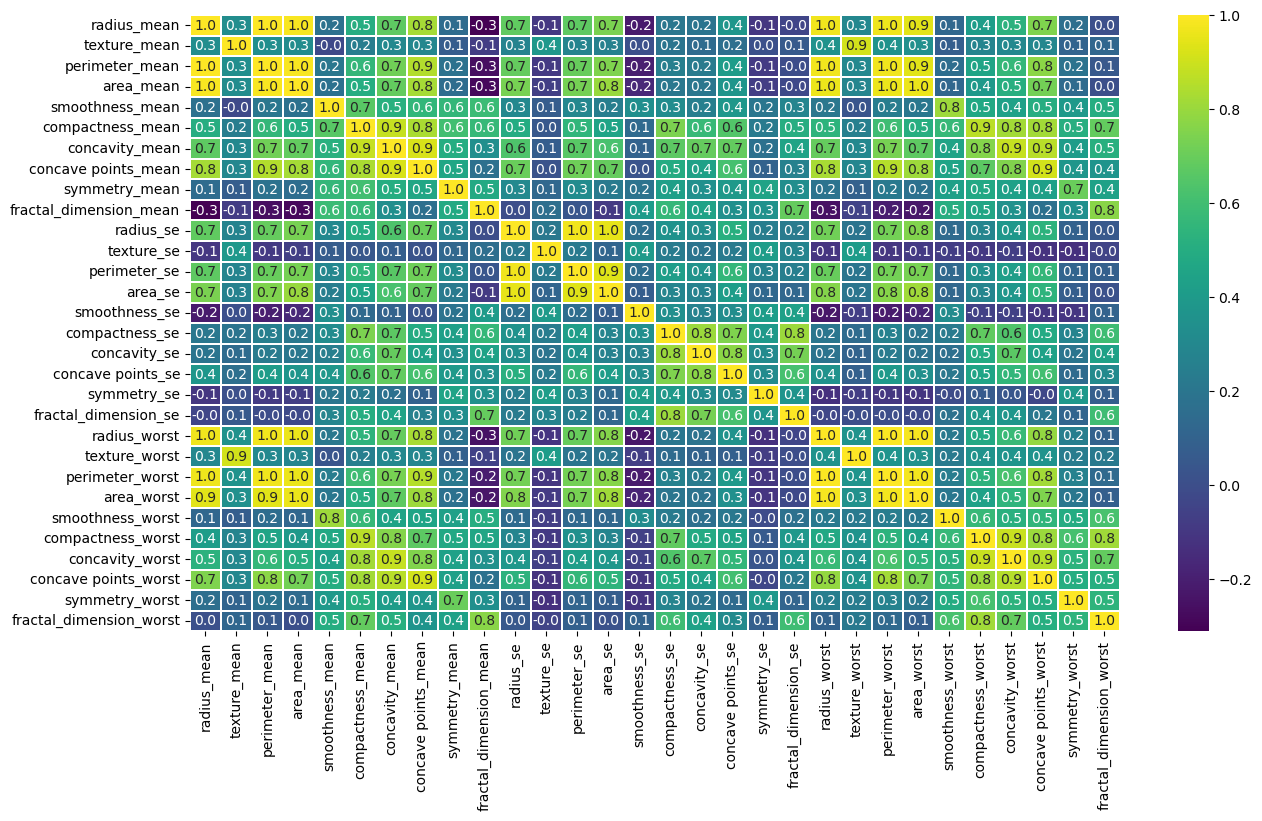

In [8]:
# Plot the correlation heatmap

corr_mat =  df.corr(numeric_only = True)
plt.figure(figsize = (15,8))
sns.heatmap(corr_mat, annot = True, fmt= ".1f", linewidths = 0.25,cmap = 'viridis')
plt.show()

In [9]:
# Transform the target variable from categorical variable to numeric using label encoder
from sklearn.preprocessing import LabelEncoder
enc =  LabelEncoder()
df['diagnosis'] = enc.fit_transform(df['diagnosis'])
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [10]:
# Seperate the Feature and Target


X =  df.drop(columns = ['diagnosis'])
y = df['diagnosis']

# Split the data into train and test set

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.20, random_state = 42)

In [11]:
# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000))
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [12]:
# Predict of Train and test Dataset

y_pred_train_log_reg = pipeline.predict(X_train)
y_pred_test_log_reg = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_log_reg =  pipeline.predict_proba(X_test)[:,1]

In [13]:
# Create a DataFrame with actual labels , predicted labels, and the predicted probabilities for positive class(Malignant

results_df_log_reg = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_log_reg,
    'Predicted Probability(M)': y_pred_test_prob_log_reg
})
round(results_df_log_reg.head(30), 3)

,Actual,Predicted,Predicted Probability(M)
204,0,0,0.114
70,1,1,1.000
131,1,1,0.997
431,0,0,0.001
540,0,0,0.000
567,1,1,1.000
369,1,1,1.000
29,1,1,0.965
81,0,0,0.379
477,0,0,0.001


In [14]:
# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy =  accuracy_score(y_test, y_pred_test_log_reg)

print('Logistic Regression')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

Logistic Regression
_____________________________________
Training Accuracy  0.9868
Testing Accuracy  0.9737


In [15]:
#np.round(pipeline.predict_proba(X_test)[:,0], 4)

In [16]:
# The results above shows the probabilty of class 0(Negative Class), a proabilirty value greater the 0.5 would mean the result 0

In [17]:
results_df_log_reg[results_df_log_reg['Actual'] != results_df_log_reg['Predicted']]

,Actual,Predicted,Predicted Probability(M)
73,1,0,0.084163
255,1,0,0.484827
238,0,1,0.542700


# Performance Metrics used in Classification

A Performance Evaluation matrix, referred as confusion matrix in the context of classification problems is the tool to assess the performance of the predictive model by comparing the actual outcomes with the predicted outcomes. it is tabular representation that allows to visualize accuracy and errors.<br>
in Binary Class Classification a Confusion Matrix is essentially a 2x2 Matrix

The matrix includes the following components:
- **True Positive (TP):** The number of instances where the model correctly predicted the positive class.
- **True Negative (TN):** The number of instances where the model correctly predicted the negative class.
- **False Positive (FP):** The number of instances where the model incorrectly predicted the positive class (Type I error).
- **False Negative (FN):** The number of instances where the model incorrectly predicted the negative class (Type II error)

![link_text](https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format)

## Accuracy Score 
The Ratio of correctly predicted instances(both positive and Negative) to the total instances
$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} +\text{FN}}$$

## Precision 
The Ratio of correctly predicted positive instances to the total positive predictions
$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

- it indicates the quality of positive predictions
- it is a ggod metric to consider when the cost of false positive is high

## Recall or Sensitivity or True Positive Rate 
The Ratio of correctly predicted positive instances to the Actual positive instances
$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

- it measure the models ability to detect positive class.
- it is a good metric to consider when the cost of false Negative is high

## F1 Score
The Harmonic mean of precision and recall. its a single metric that balances tradeoff between precision and recall

$$
\text{F1 Score} =  2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

## Specificity or True Negative Rate 
The Ratio of correctly predicted negative instances to the Actual negative instances
$$ \text{Specificity} = \frac{\text{TN}}{ \text{TN} + \text{FP} }$$
- it measure the models ability to detect positive class.
- it is a good metric to consider when the cost of false Negative is high

# ROC Curve - Receiver Operating Characterstics Curve

An ROC curve is a graphical representation of a classification model’s performance across different classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at various threshold settings.
True Positive Rate (TPR) or Recall:
$$ \text{TPR} = \frac{TP}{TP + FN} $$

False Positive Rate (FPR):
$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$

**Finding the Optimal Threshold:**

The default threshold for many classification algorithms is 0.5, meaning if the predicted probability is greater than 0.5, the instance is classified as positive. However, this threshold may not always be optimal, especially in cases with skewed class distributions or when the costs of false positives and false negatives are unequal.

**Methods to Find the Optimal Threshold:**
1. *Maximizing Youden’s J Statistic*:
  Youden's J statistic is defined as
  $J=TPR−FPR$. The optimal threshold is where this statistic is maximized. This method balances the TPR and FPR, aiming to maximize the true positives while minimizing the false positives.
2. *Closest Point to (0, 1)*:
  Another method is to find the point on the ROC curve that is closest to the top-left corner (0, 1), representing the ideal classifier with TPR = 1 and FPR = 0.

# AUC - Area under the ROC Curve
The AUC is a single scalar value that summarizes the overall performance of a classifier.
<br>
**AUC Value**

- An AUC of 0.5 suggests no discrimination, meaning the model performs no better than random chance.
- An AUC of 1.0 indicates perfect discrimination, meaning the model perfectly distinguishes between positive and negative classes.

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

Confusion Matrix
[[70  1]
 [ 2 41]]


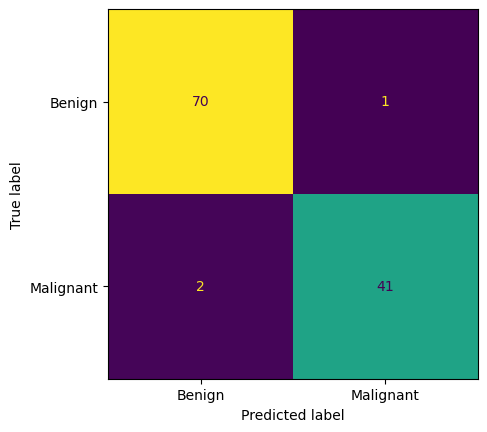

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
conf_mat =  confusion_matrix(y_test, y_pred_test_log_reg)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

print("Classification Report")
print(classification_report(y_test, y_pred_test_log_reg))

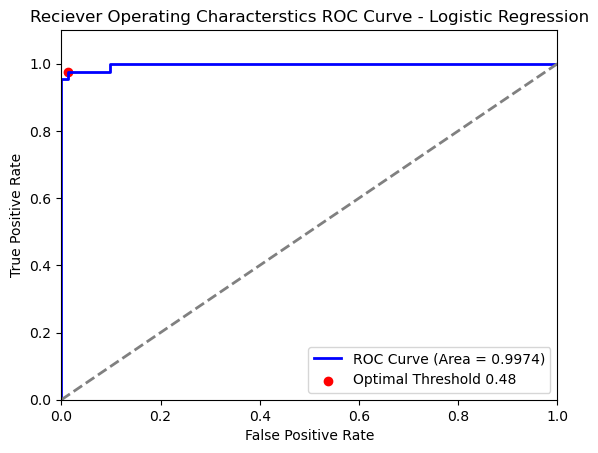

In [20]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_log_reg)
#compute AUC
roc_auc = auc(fpr, tpr)
# Calculate Youden J Statistic
J = tpr- fpr
optimal_thresh_index = np.argmax(J)
optimal_thresh = thresholds[optimal_thresh_index]

plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_thresh_index], tpr[optimal_thresh_index], color ='red',
            label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - Logistic Regression')
plt.legend(loc = 'lower right')
plt.show()


In [21]:
results_df_log_reg['Predicted66'] =  list(map(lambda x: 1 if x>=0.48 else 0, results_df_log_reg['Predicted Probability(M)'] ))

Confusion Matrix
[[70  1]
 [ 1 42]]


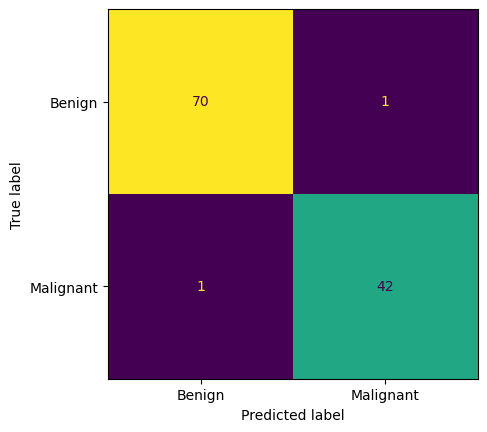

In [22]:
conf_mat =  confusion_matrix(y_test, results_df_log_reg['Predicted66'].values)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

# Naive Bayes Classifier

- Naive Bayes Classifier is probabilistic classifier based bayes theorem. Naive Bayes is called as Naive because it assumes that the input variables are independent of each other.This is a strong and unrealistic assumption for real world data
- Naive is widely used on large datasets
- Most prominent use of naive bayes is in Text Classification, Sentiment Analysis. etc

## Mathematical Concept
- **1. Bayes Theorem** - Naive Bayes Relies on Bayes Theorem , which states
  $$
  P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
  $$

  where,

  - P(A), P(B) : are the independent probabilities of A and B
  - P(B|A)     : is the probability of B given A
  - P(A|B)     : is the probability of A given B
 
    
  **Bayes Theorem** - It calculates the probability of an event occuring given that another event has already taken place.

In [23]:
##  Implement Naive Bayes on Breast Cancer Dataset
## X_train, X_test, y_train, y_test are taken from previous data split.

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('gnb', GaussianNB())])

In [26]:
# Predict of Train and test Dataset

y_pred_train_gnb = pipeline.predict(X_train)
y_pred_test_gnb = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_gnb =  pipeline.predict_proba(X_test)[:,1]

In [27]:
# Create a DataFrame with actual labels , predicted labels, and the predicted probabilities for positive class(Malignant

results_df_gnb = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_gnb,
    'Predicted Probability(M)': y_pred_test_prob_gnb
})
round(results_df_gnb.head(5), 3)

,Actual,Predicted,Predicted Probability(M)
204,0,0,0.0
70,1,1,1.0
131,1,1,1.0
431,0,0,0.0
540,0,0,0.0


Naive Bayes Classifier
_____________________________________
Training Accuracy  0.9363
Testing Accuracy  0.9649
Confusion Matrix
[[70  1]
 [ 3 40]]


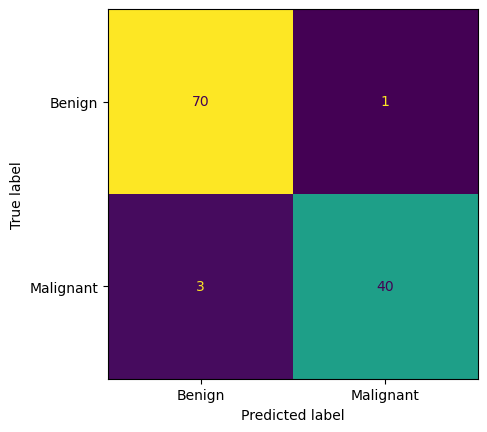

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



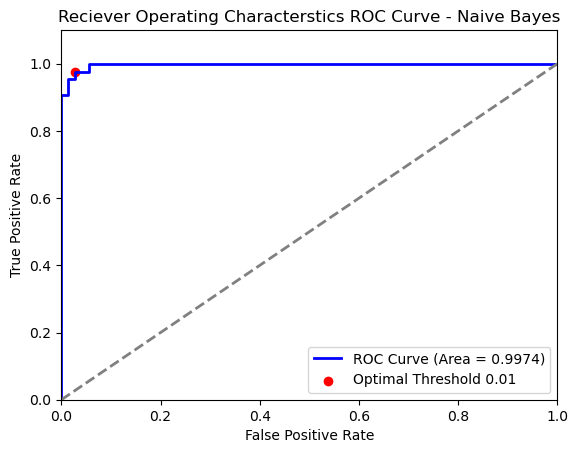

In [28]:
# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_gnb)
testing_accuracy =  accuracy_score(y_test, y_pred_test_gnb)

print('Naive Bayes Classifier')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_gnb)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_gnb))


# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_gnb)
#compute AUC
roc_auc = auc(fpr, tpr)
# Calculate Youden J Statistic
J = tpr- fpr
optimal_thresh_index = np.argmax(J)
optimal_thresh = thresholds[optimal_thresh_index]

plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_thresh_index], tpr[optimal_thresh_index], color ='red',
            label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - Naive Bayes')
plt.legend(loc = 'lower right')
plt.show()


# K Nearest Neighbors

The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm retains the entire training dataset as a reference. For predictions, it computes the distance between the input data point and all training examples using a selected distance metric, such as Euclidean distance, as illustrated in the diagram below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/KNN.png)

### Steps

**Step 1:** Load the training and test data.

**Step 2:** Choose the value of K, which represents the number of nearest neighbors to consider. (K can be any positive integer)

**Note:** The optimal value for K will depend on the specific dataset and the problem being solved. It's often determined through cross-validation.

**Step 3:** For every point in the test data, do the following:

- Calculate the distance between the test data point and each point in the training dataset using a distance metric such as Euclidean, Manhattan, or Hamming distance.
- Sort the calculated distances in ascending order.
- Select the top K closest data points (smallest distances) from the sorted list.
- Assign the most frequent class (mode) among these K nearest neighbors to the test data point.

In [29]:
#Implement KNN on Breast Cancer Dataset

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# for Regression use KNeighborsRegressor


In [31]:
# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors =5))
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [32]:
# Predict of Train and test Dataset

y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_knn =  pipeline.predict_proba(X_test)[:,1]

In [33]:
# Create a DataFrame with actual labels , predicted labels, and the predicted probabilities for positive class(Malignant

results_df_knn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_knn,
    'Predicted Probability(M)': y_pred_test_prob_knn
})
round(results_df_knn.head(5), 3)

,Actual,Predicted,Predicted Probability(M)
204,0,0,0.0
70,1,1,1.0
131,1,1,1.0
431,0,0,0.0
540,0,0,0.0


K Neighbors Classifier
_____________________________________
Training Accuracy  0.9802
Testing Accuracy  0.9474
Confusion Matrix
[[68  3]
 [ 3 40]]


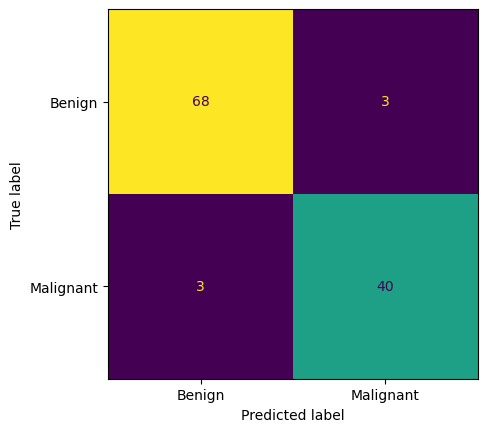

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



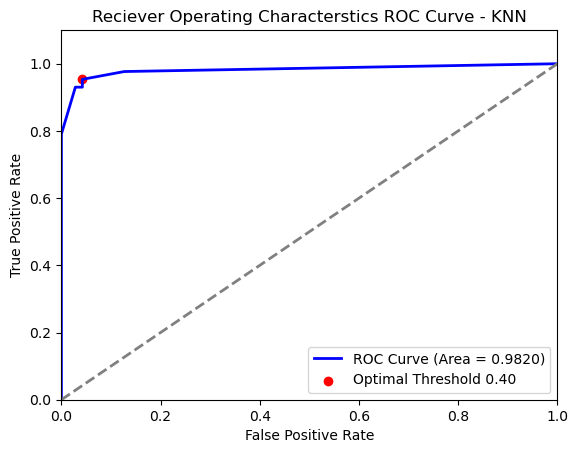

In [34]:
# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_knn)
testing_accuracy =  accuracy_score(y_test, y_pred_test_knn)

print('K Neighbors Classifier')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_knn)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_knn))


# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_knn)
#compute AUC
roc_auc = auc(fpr, tpr)
# Calculate Youden J Statistic
J = tpr- fpr
optimal_thresh_index = np.argmax(J)
optimal_thresh = thresholds[optimal_thresh_index]

plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_thresh_index], tpr[optimal_thresh_index], color ='red',
            label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - KNN')
plt.legend(loc = 'lower right')
plt.show()

# Hyperparameter Tuning of  KNN

The number of Neighbors *k* is crucial hyperparameter in K Nearest Neighbors algorithm. It specifies how many nearest neighbors should be considered for making predictions. The selection og *k* impact the models capability to generalize effectively: a small *k* can make the model sensitive to the noise, potentially lead to overfitting. while a larger *k* might include less relevant neighbors, possibly cause underfitting.

In [35]:
# use grid search cv with cross validation to find the optimal k

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Define the parameter Grid

param_grid = {'knn__n_neighbors':np.arange(1, 21)}

# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Initialize Grid Search CV

search =  GridSearchCV(pipeline, param_grid, cv = 10, scoring='accuracy')

# Fit GridSearchCV to the data

search.fit(X_train, y_train)
# get best k value and score
optimal_k = search.best_params_['knn__n_neighbors']
print(f"The optimal number of neighbors is  {optimal_k}")
best_score =  search.best_score_
print(f"The Best Cross Validated accuracy is  {best_score:.4f}")



The optimal number of neighbors is  7
The Best Cross Validated accuracy is  0.9714


In [38]:
# Get Cross Validation Results
cv_results = search.cv_results_

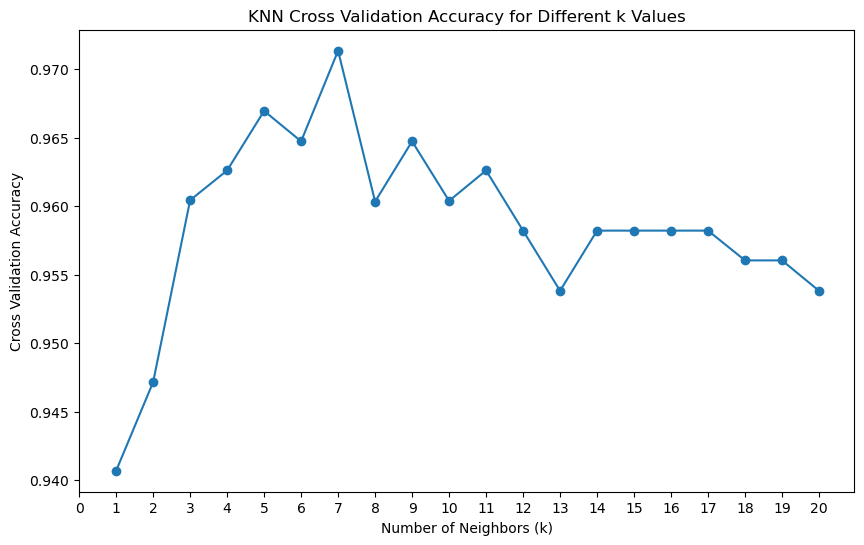

In [39]:
# Plot The cross Validation Accuracy for different k values
plt.figure(figsize = (10,6))
plt.plot(param_grid['knn__n_neighbors'], cv_results['mean_test_score'], marker = 'o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross Validation Accuracy')
plt.title('KNN Cross Validation Accuracy for Different k Values')
plt.xticks(np.arange(0, 21))
plt.show()

K Neighbors Classifier - Cross Validated
_____________________________________
Training Accuracy  0.9692
Testing Accuracy  0.9474
Confusion Matrix
[[68  3]
 [ 3 40]]


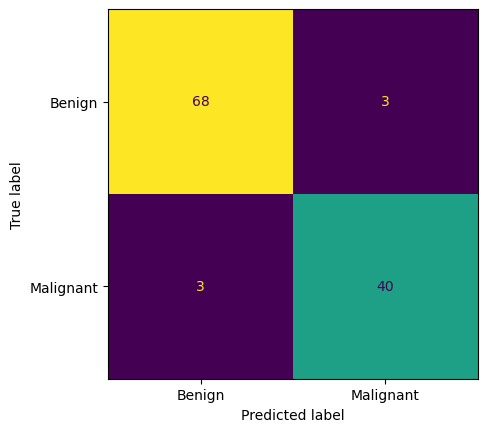

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [40]:
# Predict of Train and test Dataset with Grid

y_pred_train_knn_grid = search.predict(X_train)
y_pred_test_knn_grid = search.predict(X_test)

# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_knn_grid)
testing_accuracy =  accuracy_score(y_test, y_pred_test_knn_grid)

print('K Neighbors Classifier - Cross Validated')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_knn_grid)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_knn_grid))

# Decision Tree 

A Decision Tree is a non parametric Supervised ML Algorithm used for classification and regression

- it has heirarchical tree structure which consist of root node , branches,internal/decision nodes, leaf nodes

## How Decision Trees Works

Creating a Decision Tree involves a series of steps aimed at systematically breaking down the dataset based on its features to achieve best possible  classification or prediction.
- **Selecting Best Attribute** - Choosing the best attribute to split data using metric like *Gini Impurity , Entropy and Information Gain*
- **Splitting the Dataset** - The Dataset is divided into subsets based on the values of the selected attribute
- **Repeating the Process** - The process is repeated recursively for each subsets, creating new internal nodes or leaf nodes until a stopping criterion is met. 

## Metrics for Splitting

- **Gini Impurity** - Gini Impurity is the measure of the impurity or disorder in a set of elements. This metric measures the liklihood of incorrectly classifiying a randomly chosen element.  The Value for gini impurity ranges from 0 (perfectly pure) to 0.5 (maximum impurity in a binary classification problem). Mathematically:
  $$ Gini =  1- \sum_{i=1}^{n}{(p_{i})}^2$$

  where $p_{i} $ is the probability of an instance being classified into class *i*

- **Entropy** - Entropy Quantifies the amount of uncertainity in the dataset Mathematically:
  $$ Entropy =  - \sum_{i=1}^{n}{p_{i}.log_{2}(p_{i})}$$

  where $p_{i} $ is the probability of an instance being classified into class *i*

- **Information Gain** -This Metric measures the reduction in entropy or Gini Impurity after the dataset is split on an attribute. Mathematically:
  $$ \text{Information Gain} = \text{Entropy(Parent)} - \sum_{i=1}^{n}( \frac{|D_{i}|}{|D|} \times \text{Entropy}D_{i} )$$

  where $D_{i} $ is the subset of D after being split by an attibute.


In [41]:
# Apply Decision Tree on Breast Cancer DataSet

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier())
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier())])

In [44]:
# Predict of Train and test Dataset

y_pred_train_dtc = pipeline.predict(X_train)
y_pred_test_dtc = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_dtc =  pipeline.predict_proba(X_test)[:,1]

In [45]:
# Create a DataFrame with actual labels , predicted labels, and the predicted probabilities for positive class(Malignant

results_df_dtc = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_dtc,
    'Predicted Probability(M)': y_pred_test_prob_dtc
})
round(results_df_dtc.head(5), 3)

,Actual,Predicted,Predicted Probability(M)
204,0,0,0.0
70,1,1,1.0
131,1,1,1.0
431,0,0,0.0
540,0,0,0.0


Decision Tree Classifier
_____________________________________
Training Accuracy  1.0000
Testing Accuracy  0.9298
Confusion Matrix
[[67  4]
 [ 4 39]]


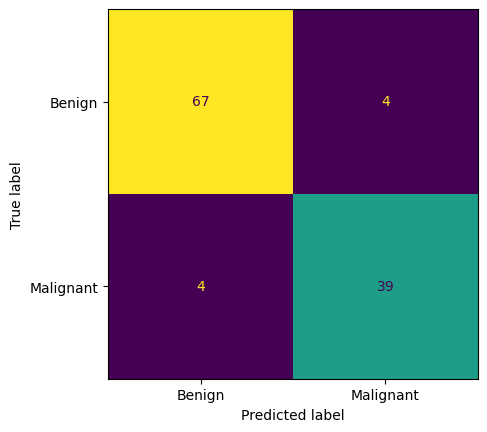

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



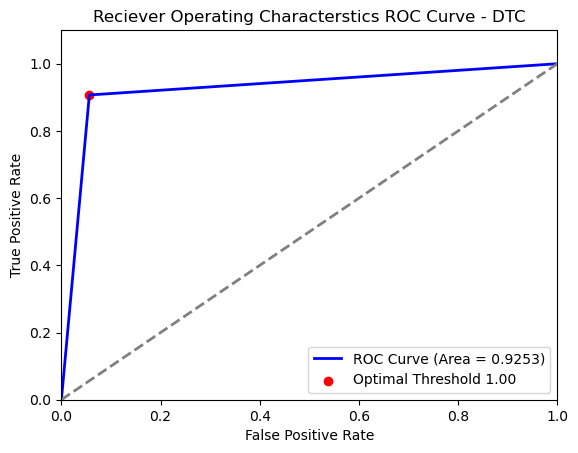

In [46]:
# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_dtc)
testing_accuracy =  accuracy_score(y_test, y_pred_test_dtc)

print('Decision Tree Classifier')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_dtc)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_dtc))


# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_dtc)
#compute AUC
roc_auc = auc(fpr, tpr)
# Calculate Youden J Statistic
J = tpr- fpr
optimal_thresh_index = np.argmax(J)
optimal_thresh = thresholds[optimal_thresh_index]

plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_thresh_index], tpr[optimal_thresh_index], color ='red',
            label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - DTC')
plt.legend(loc = 'lower right')
plt.show()

#### Advantages of Decision Tree
- Simplicity and interpretable
- Versatile
- No need for scaling
- Handle Non Linear Relationships
#### Disadvantages of Decision Tree
- Overfitting
- Instable
- Biased

## Pruning 
To address the issue of overfitting, decision tree can be pruned. Pruning involves removing the parts of the tree that do not provide significant poer to classify.There are 2 way to achieve this
- **Pre- Pruning(Early Stopping)** - Halts the growth of tree early based on a stopping criterion such as max depth or minimum number of samples requiredto perform split.
- **Post Pruning** -  First grows the full tree and then removes nodes that add little predictive powerto reduce the complexity of the model.

Decision Tree Classifier
_____________________________________
Training Accuracy  0.9648
Testing Accuracy  0.9386
Confusion Matrix
[[68  3]
 [ 4 39]]


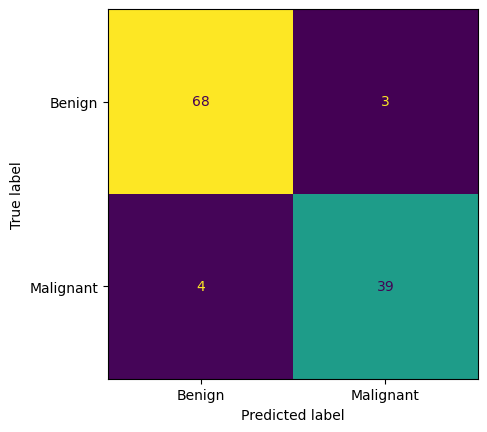

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [47]:
# Applying Prepruning

# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(max_depth = 3, min_samples_split = 20))
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

# Predict of Train and test Dataset

y_pred_train_dtc = pipeline.predict(X_train)
y_pred_test_dtc = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_dtc =  pipeline.predict_proba(X_test)[:,1]


# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_dtc)
testing_accuracy =  accuracy_score(y_test, y_pred_test_dtc)

print('Decision Tree Classifier')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_dtc)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_dtc))

In [48]:
# Apply Post Pruning

from sklearn.preprocessing import StandardScaler


In [49]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [50]:
dtcnew =  DecisionTreeClassifier()


In [51]:
path = dtcnew.cost_complexity_pruning_path(X_train_scaled, y_train)

In [52]:
ccp_alphas  = path.ccp_alphas
impurities =  path.impurities

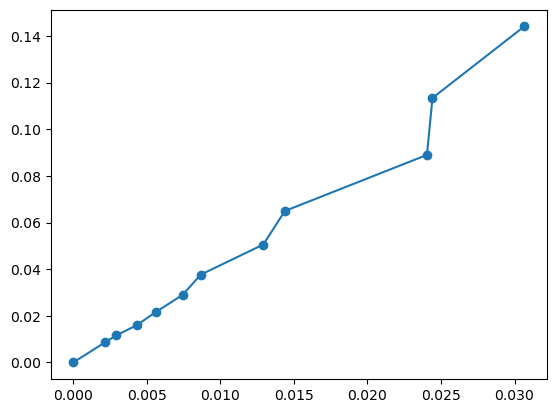

In [53]:
plt.plot(ccp_alphas[:-1], impurities[:-1], marker ='o')

Decision Tree Classifier
_____________________________________
Training Accuracy  0.9582
Testing Accuracy  0.9474
Confusion Matrix
[[69  2]
 [ 4 39]]


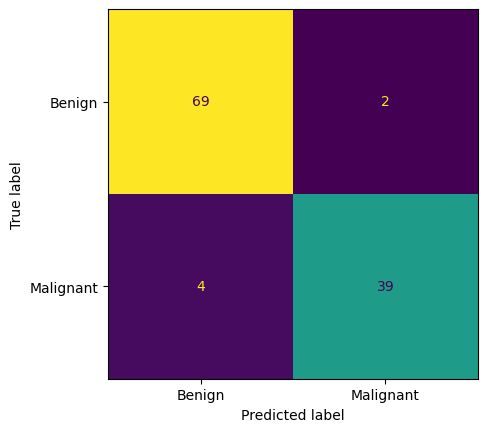

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [54]:
# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(ccp_alpha = 0.015))
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

# Predict of Train and test Dataset

y_pred_train_dtc = pipeline.predict(X_train)
y_pred_test_dtc = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_dtc =  pipeline.predict_proba(X_test)[:,1]


# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_dtc)
testing_accuracy =  accuracy_score(y_test, y_pred_test_dtc)

print('Decision Tree Classifier')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_dtc)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_dtc))

In [55]:
dtc2 =  DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [56]:
from sklearn.tree import export_text, plot_tree

In [57]:
print(export_text(dtc2, feature_names=X_train.columns, class_names=['Benign', 'Malignant']))

|--- concave points_mean <= 0.08
|   |--- radius_worst <= 0.12
|   |   |--- area_se <= 0.18
|   |   |   |--- class: Benign
|   |   |--- area_se >  0.18
|   |   |   |--- class: Malignant
|   |--- radius_worst >  0.12
|   |   |--- texture_mean <= -0.70
|   |   |   |--- class: Benign
|   |   |--- texture_mean >  -0.70
|   |   |   |--- class: Malignant
|--- concave points_mean >  0.08
|   |--- perimeter_worst <= 0.22
|   |   |--- texture_worst <= 0.02
|   |   |   |--- class: Benign
|   |   |--- texture_worst >  0.02
|   |   |   |--- class: Malignant
|   |--- perimeter_worst >  0.22
|   |   |--- class: Malignant



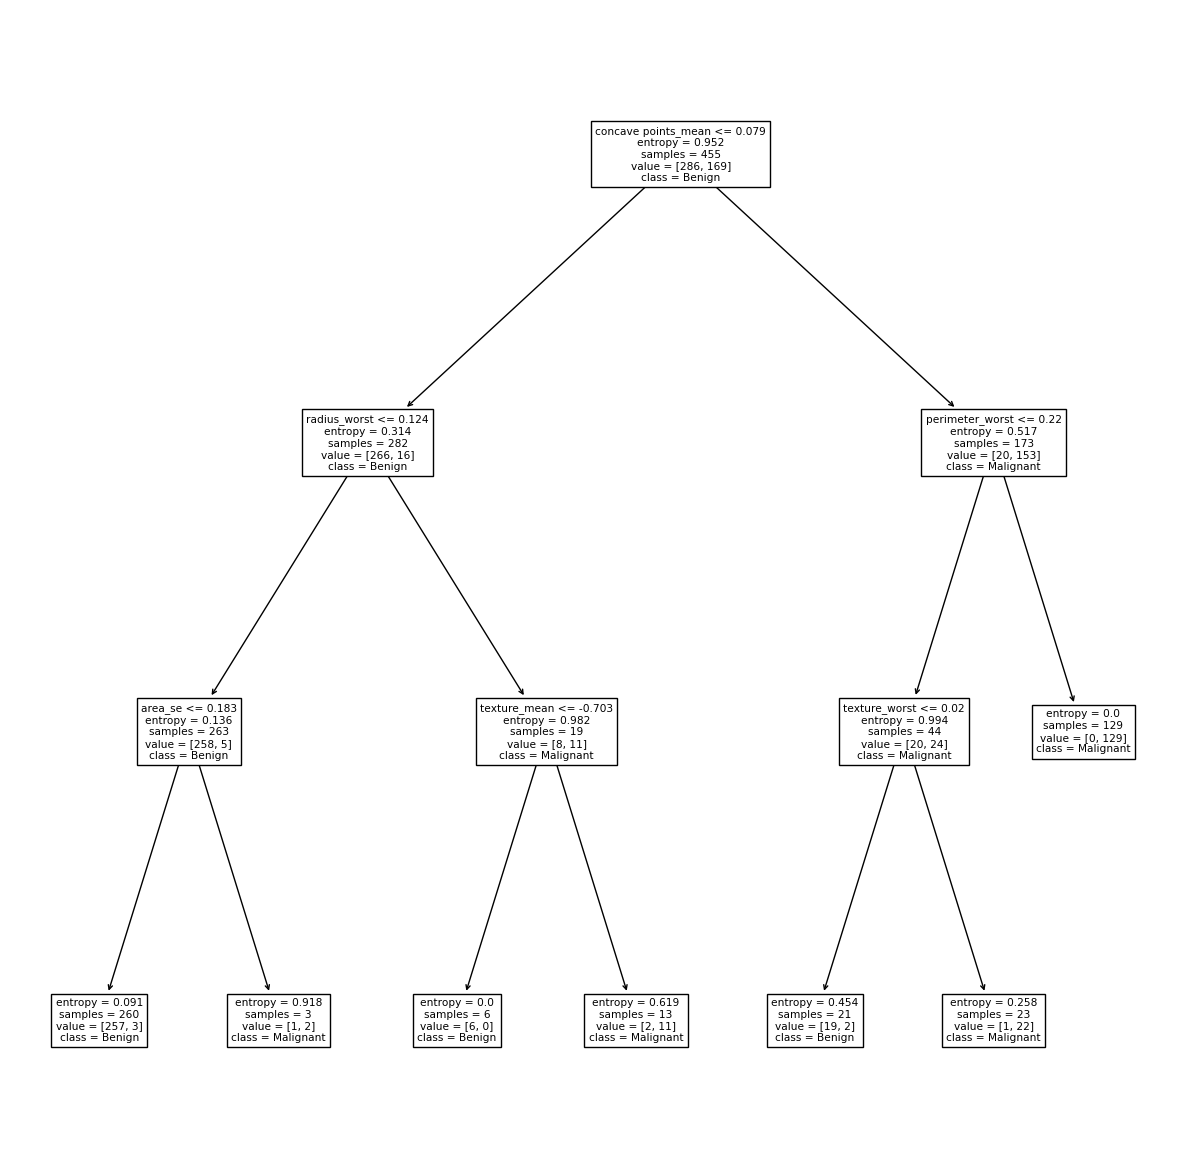

In [58]:
plt.figure(figsize = (15,15))
plot_tree(dtc2, feature_names=X_train.columns, class_names=['Benign', 'Malignant'])
plt.show()

# Support Vector Machine

it is a supervised Machine Learning Algorithm used for both classification and regression. it is primarily used for classification problems
- In SVM the required straight line to fit the data is called the hyperplane
- The goal is to find a hyperplane in n dimensional space that distinctly classifies the data points
- The closest data points to the hyperplane on either side are called support vectors.
- These support vectors helps in identifying the position and orientation of the hyperplane

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/SVM.png)

There are two types of Support Vector Machine
- **Linear SVM**
- **Non Linear SVM**

In [59]:
# Apply SVM on Breasr Cancer Dataset

In [60]:
from sklearn.svm import SVC

In [62]:
# Define the pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability = True))
])

# Fit Pipeline

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [63]:
# Predict of Train and test Dataset

y_pred_train_svm = pipeline.predict(X_train)
y_pred_test_svm = pipeline.predict(X_test)

# Predict the probabilties on the testing set
y_pred_test_prob_svm =  pipeline.predict_proba(X_test)[:,1]

In [64]:
# Create a DataFrame with actual labels , predicted labels, and the predicted probabilities for positive class(Malignant

results_df_svm = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_svm,
    'Predicted Probability(M)': y_pred_test_prob_svm
})
round(results_df_svm.head(5), 3)

,Actual,Predicted,Predicted Probability(M)
204,0,0,0.018
70,1,1,1.000
131,1,1,1.000
431,0,0,0.000
540,0,0,0.000


Support Vector Classifier
_____________________________________
Training Accuracy  0.9890
Testing Accuracy  0.9825
Confusion Matrix
[[71  0]
 [ 2 41]]


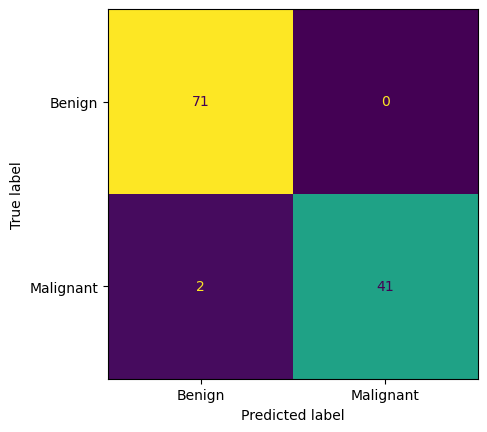

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



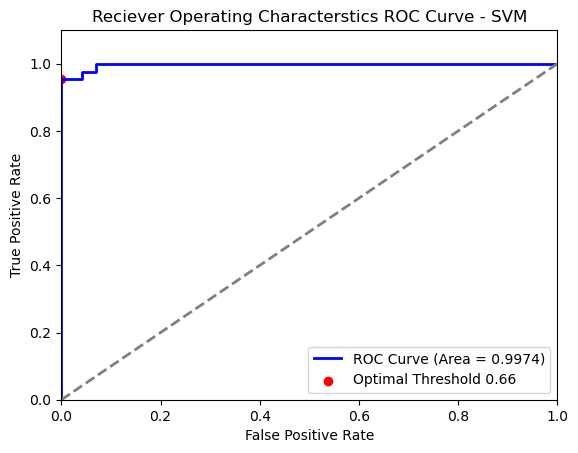

In [65]:
# Calculate the accuracy score for training and Testing
training_accuracy =  accuracy_score(y_train, y_pred_train_svm)
testing_accuracy =  accuracy_score(y_test, y_pred_test_svm)

print('Support Vector Classifier')
print('_____________________________________')
print(f'Training Accuracy  {training_accuracy:.4f}')
print(f'Testing Accuracy  {testing_accuracy:.4f}')

# Print Confusion Matrix
conf_mat =  confusion_matrix(y_test, y_pred_test_svm)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()


# Print Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred_test_svm))


# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_svm)
#compute AUC
roc_auc = auc(fpr, tpr)
# Calculate Youden J Statistic
J = tpr- fpr
optimal_thresh_index = np.argmax(J)
optimal_thresh = thresholds[optimal_thresh_index]

plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_thresh_index], tpr[optimal_thresh_index], color ='red',
            label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - SVM')
plt.legend(loc = 'lower right')
plt.show()

The Important Hyperparmeters in SVC are 
- *Kernel* - the kernel function transforms the input data into a higher dimensional space where a hyperplane can be used to seperate classes that are not linearly seperable.
  - linear -  No Transformation is done. Best suited for linearly seperable data
  - Polynomial - Transforms data by considering the polynomial combination of input features
  - rbf(Radial Basis Function) - Exploits the distance between feature vectors in a radial basis.
- *C* -  Regularization parameter. A higher `C` tries to classify all training examples correctly, and lower `C` allows more misclassifications
- *gamma*-  used to avoid overfitting in certain kernel types like `rbf`